In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dir_path = os.path.abspath(os.path.join(os.path.dirname(__file__), "..", ".."))
print(dir_path)

In [ ]:
def csv_import(name, delimiter="|"):
    x = pd.read_csv(name, encoding='utf8', low_memory=False, delimiter=delimiter,
                    dtype={'text': str,
                           "CH_Disbursement": float
                           }
                    )
    return x


df = csv_import(dir_path + "/Data/climate_finance_total_with_CRS_disbursement.csv")
df = df[df.climate_relevance==1]
df=df.rename(columns={'Year':'effective_year','total_disbursement':'effective_funding'})
df['no_projects'] = 1

df_time = df
df_time['adaptation_funding'] = 0
df_time['mitigation_funding'] = 0
df_time['environment_funding'] = 0
df_time.adaptation_funding[df_time.meta_category=='Adaptation'] = df_time.effective_funding
df_time.mitigation_funding[df_time.meta_category=='Mitigation'] = df_time.effective_funding
df_time.environment_funding[df_time.meta_category=='Environment'] = df_time.effective_funding
df_time=df_time[['effective_year','adaptation_funding','mitigation_funding','environment_funding']].groupby('effective_year').sum().reset_index()
df_time.to_csv(dir_path +"/Data/timeline_CRS.csv", index=False)

df2 = df[['climate_relevance','climate_class_number','climate_class','meta_category','no_projects','effective_funding']]\
    .groupby(['climate_relevance','climate_class_number','climate_class','meta_category']).sum().reset_index()
df2.to_csv(dir_path + "/Data/descriptives_all_years_CRS.csv", index=False)

C:\Users\chloe\AppData\Local\Temp/ipykernel_51416/1758996217.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.adaptation_funding[df_time.meta_category=='Adaptation'] = df_time.effective_funding
C:\Users\chloe\AppData\Local\Temp/ipykernel_51416/1758996217.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.mitigation_funding[df_time.meta_category=='Mitigation'] = df_time.effective_funding
C:\Users\chloe\AppData\Local\Temp/ipykernel_51416/1758996217.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

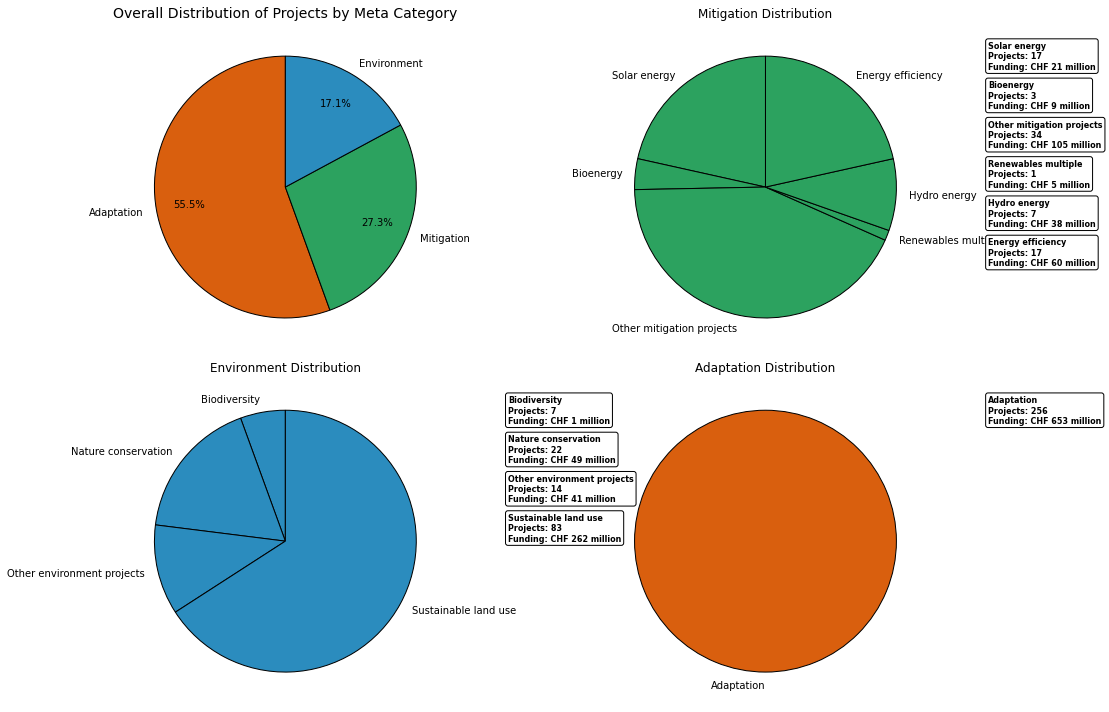

In [ ]:
df2['climate_class'] = df2['climate_class'].str.replace('-', ' ', regex=False)
df2['climate_class'] = df2['climate_class'].str.replace('_', ' ', regex=False)

color_mapping = {
    'Adaptation': '#d95f0e',
    'Mitigation': '#2ca25f',
    'Environment': '#2b8cbe'
}


df2['color'] = df2['meta_category'].map(color_mapping)

# main Pie Chart
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221, aspect='equal')
wedges1, texts1, _ = ax1.pie(
    df2.groupby('meta_category')['no_projects'].sum(),  
    labels=['Adaptation', 'Mitigation', 'Environment'],  
    autopct='%1.1f%%',
    startangle=90,
    colors=['#d95f0e','#2ca25f','#2b8cbe'], 
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.75 
)

for i, wedge in enumerate(wedges1):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    angle = angle * (3.14159 / 180.)  # Convert to radians
    x = 1.4 * wedge.r * np.cos(angle)
    y = 1.4 * wedge.r * np.sin(angle)

ax1.set_title('Overall Distribution of Projects by Meta Category', fontsize=14)


# other pie charts
ax2 = fig.add_subplot(222, aspect='equal')
ax3 = fig.add_subplot(223, aspect='equal')
ax4 = fig.add_subplot(224, aspect='equal')
categories = ['Mitigation', 'Environment', 'Adaptation']
axes = [ax2, ax3, ax4]

for i, category in enumerate(categories):
    category_data = df2[df2['meta_category'] == category]
    wedges, texts = axes[i].pie(
        category_data['no_projects'], 
        labels=category_data['climate_class'],  
        startangle=90, 
        colors=category_data['color'], 
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.75  
    )
    
    for j, climate_class in enumerate(category_data['climate_class']):
        projects = category_data[category_data['climate_class'] == climate_class]['no_projects'].values[0]
        funding = category_data[category_data['climate_class'] == climate_class]['effective_funding'].values[0]
        
        class_text = (
            f"{climate_class}\n"
            f"Projects: {projects}\n"
            f"Funding: CHF {funding:,.0f}".replace(",", " ") + " million"
        )
     
        axes[i].text(1.7, 1.0 - 0.3 * j, class_text, ha='left', va='center', fontsize=8, fontweight='bold',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    axes[i].set_title(f'{category} Distribution', fontsize=12)


plt.tight_layout()
plt.savefig("Figure3", dpi=300)
plt.show()
